<a href="https://colab.research.google.com/github/Krish-Bali/Pytorch-learning/blob/main/non_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install sklearn.datasets

ERROR: Could not find a version that satisfies the requirement sklearn.datasets (from versions: none)
ERROR: No matching distribution found for sklearn.datasets


In [2]:
pip install scikit-learn

In [3]:
pip install --upgrade scikit-learn


In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles




In [5]:
n_samples=1000
x,y=make_circles(n_samples,
                 noise=0.3,
                 random_state=42)

In [6]:
print(f'first x 5 features{x[:5]}')
print(f'first y 5 features{y[:5]}')

first x 5 features[[ 0.59171471  0.43674853]
 [-0.45745002  0.36160118]
 [-1.01069349  0.83042101]
 [-0.87169639  0.41407292]
 [ 0.48803455 -0.87258708]]
first y 5 features[1 1 1 1 0]


In [7]:
import pandas as pd

In [8]:
circles =pd.DataFrame(
    {'x1':x[:,0],
     'x2':x[:,1],
     'label':y}
)
circles.head(10)

,x1,x2,label
0,0.591715,0.436749,1
1,-0.457450,0.361601,1
2,-1.010693,0.830421,1
3,-0.871696,0.414073,1
4,0.488035,-0.872587,0
5,-0.347874,1.103071,1
6,-0.046008,0.834056,1
7,0.610994,0.306608,1
8,-0.255312,-0.879601,1
9,0.025255,1.300938,0


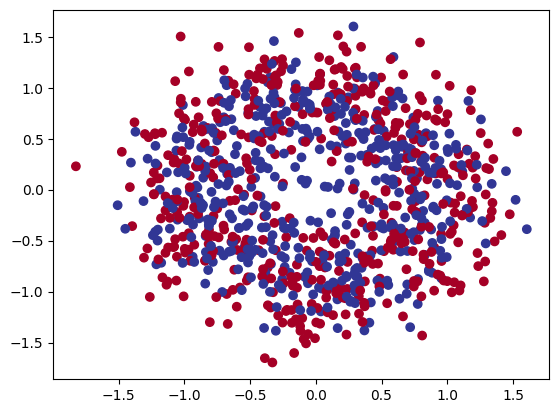

In [9]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=x[:, 0],
            y=x[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [10]:
import torch

In [11]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.5917,  0.4367],
         [-0.4575,  0.3616],
         [-1.0107,  0.8304],
         [-0.8717,  0.4141],
         [ 0.4880, -0.8726]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [13]:
# Upgrade pip
!pip install --upgrade pip

# Upgrade numpy and scipy
!pip install --upgrade numpy scipy

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 113.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 54.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires numpy<2.0a0,>=1.23, but you have numpy 2.1.1 which is incompatible.
cupy-cuda12x 12.2.0 

In [14]:
!pip install scikit-learn==1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [15]:
import torch
from torch import nn
device='cuda' if torch.cuda.is_available() else 'cpu'

In [16]:
class circlemodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=5)
    self.layer2=nn.Linear(in_features=5,out_features=1)

  def forward(self,x):
    return self.layer2(self.layer1(x))

In [17]:
model_0=circlemodel().to(device)
model_0

circlemodel(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
# make prediction with the model
untrained_pred=model_0(X_test.to(device))
print(f'lenght kf the untrained ored : {len(untrained_pred)}, shape :{untrained_pred.shape}')
print(f'lenght of the y_test : {len(y_test)},shape :{y_test.shape}')
untrained_pred[:10]
y_test[:10]

lenght kf the untrained ored : 200, shape :torch.Size([200, 1])
lenght of the y_test : 200,shape :torch.Size([200])


tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

In [20]:
untrained_pred[:10]

tensor([[-0.2105],
        [-0.1192],
        [-0.1653],
        [-0.2349],
        [ 0.0390],
        [ 0.0863],
        [-0.0312],
        [-0.0069],
        [-0.0878],
        [-0.2102]], grad_fn=<SliceBackward0>)

In [21]:
device

'cpu'

In [22]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

In [23]:
def accuracy(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

In [24]:
y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.2105],
        [-0.1192],
        [-0.1653],
        [-0.2349],
        [ 0.0390]], grad_fn=<SliceBackward0>)

In [25]:
y_pred_prob=torch.sigmoid(y_logits)

In [26]:
y_pred_prob

tensor([[0.4476],
        [0.4702],
        [0.4588],
        [0.4415],
        [0.5097]], grad_fn=<SigmoidBackward0>)

In [27]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_prob)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 1.], grad_fn=<SqueezeBackward0>)

In [28]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [29]:
import torch

torch.manual_seed(18)
epochs = 6
for epoch in range(epochs):
    model_0.train()
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing phase
    model_0.eval()
    with torch.inference_mode():
        y_logits_test = model_0(X_test).squeeze()
        y_pred_test = torch.round(torch.sigmoid(y_logits_test))

        test_loss = loss_fn(y_logits_test, y_test)
        test_acc = accuracy(y_true=y_test, y_pred=y_pred_test)

    # Fallback in case any are None
    loss = loss if loss is not None else 0.0
    acc = acc if acc is not None else 0.0
    test_loss = test_loss if test_loss is not None else 0.0
    test_acc = test_acc if test_acc is not None else 0.0

    if epoch % 2 == 0:
        print(f"epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


epoch: 0 | Loss: 0.69751, Accuracy: 44.88% | Test Loss: 0.69491, Test Accuracy: 53.00%
epoch: 2 | Loss: 0.69682, Accuracy: 44.88% | Test Loss: 0.69441, Test Accuracy: 53.50%
epoch: 4 | Loss: 0.69629, Accuracy: 45.25% | Test Loss: 0.69405, Test Accuracy: 53.00%


In [30]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("file exits skipping download")
else:
  print("downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
from helper_functions import plot_predictions,plot_decision_boundary

downloading helper_functions.py


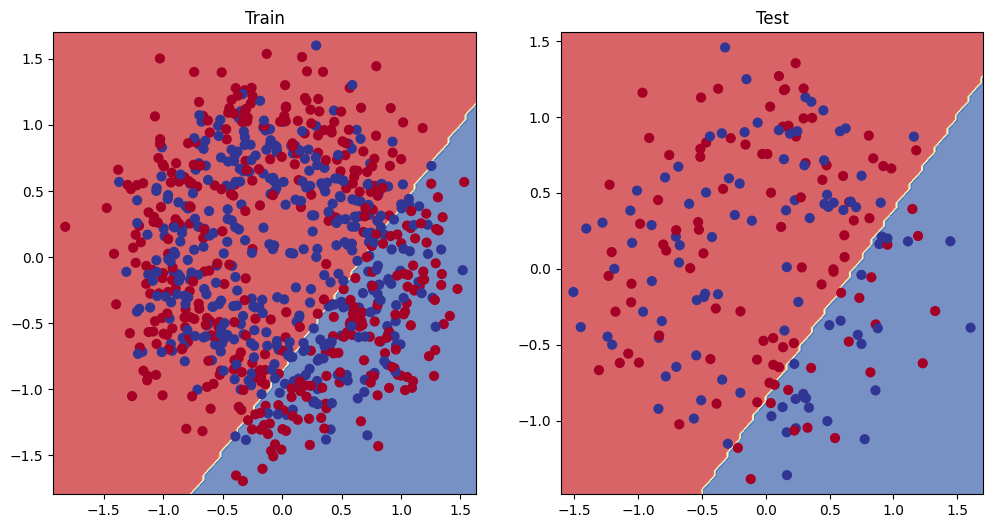

In [31]:
# Plot decision boundaries for training and test sets
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [32]:
class circlemodel2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=10)
    self.layer2=nn.Linear(in_features=10,out_features=10)
    self.layer3=nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer3(self.layer2(self.layer1(x)))

model_1=circlemodel2().to(device)
model_1

circlemodel2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [33]:
loss_fn=nn.BCEWithLogitsLoss()
optimiser=torch.optim.SGD(model_1.parameters(),lr=0.1
                       )

In [34]:
torch.manual_seed(20)
epochs=1000
for epoch in range(epochs):
  model_1.train()
  y_logits=model_1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy(y_true=y_train,
                      y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits=model_1(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                            y_test)
    test_acc = accuracy(y_true=y_test,
                               y_pred=test_pred)

  if epoch % 100 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.73338, Accuracy: 50.12% | Test loss: 0.72848, Test acc: 50.00%
Epoch: 100 | Loss: 0.73338, Accuracy: 50.12% | Test loss: 0.72848, Test acc: 50.00%
Epoch: 200 | Loss: 0.73338, Accuracy: 50.12% | Test loss: 0.72848, Test acc: 50.00%
Epoch: 300 | Loss: 0.73338, Accuracy: 50.12% | Test loss: 0.72848, Test acc: 50.00%
Epoch: 400 | Loss: 0.73338, Accuracy: 50.12% | Test loss: 0.72848, Test acc: 50.00%
Epoch: 500 | Loss: 0.73338, Accuracy: 50.12% | Test loss: 0.72848, Test acc: 50.00%
Epoch: 600 | Loss: 0.73338, Accuracy: 50.12% | Test loss: 0.72848, Test acc: 50.00%
Epoch: 700 | Loss: 0.73338, Accuracy: 50.12% | Test loss: 0.72848, Test acc: 50.00%
Epoch: 800 | Loss: 0.73338, Accuracy: 50.12% | Test loss: 0.72848, Test acc: 50.00%
Epoch: 900 | Loss: 0.73338, Accuracy: 50.12% | Test loss: 0.72848, Test acc: 50.00%


In [35]:
from torch import nn
class circlemodel3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=10)
    self.layer2=nn.Linear(in_features=10,out_features=10)
    self.layer3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model3=circlemodel3()
model3

circlemodel3(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [36]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(model3.parameters(),lr=0.1)

In [37]:
torch.manual_seed(20)
epochs=100
for epoch in range(epochs):
  model3.train()
  y_logits = model3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
  acc = accuracy(y_true=y_train,
                      y_pred=y_pred)

  optimizer.zero_grad()


  loss.backward()

  optimizer.step()

  model3.eval()
  with torch.inference_mode():
    test_logits = model3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy(y_true=y_test,
                             y_pred=test_pred)
    if epochs % 10 ==0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.71073, Accuracy: 50.00% | Test Loss: 0.70786, Test Accuracy: 50.00%
Epoch: 1 | Loss: 0.70949, Accuracy: 50.00% | Test Loss: 0.70686, Test Accuracy: 50.00%
Epoch: 2 | Loss: 0.70833, Accuracy: 50.00% | Test Loss: 0.70592, Test Accuracy: 50.00%
Epoch: 3 | Loss: 0.70724, Accuracy: 50.00% | Test Loss: 0.70506, Test Accuracy: 50.00%
Epoch: 4 | Loss: 0.70623, Accuracy: 50.00% | Test Loss: 0.70427, Test Accuracy: 50.00%
Epoch: 5 | Loss: 0.70528, Accuracy: 50.00% | Test Loss: 0.70352, Test Accuracy: 50.00%
Epoch: 6 | Loss: 0.70440, Accuracy: 50.00% | Test Loss: 0.70284, Test Accuracy: 50.00%
Epoch: 7 | Loss: 0.70358, Accuracy: 50.00% | Test Loss: 0.70220, Test Accuracy: 50.00%
Epoch: 8 | Loss: 0.70282, Accuracy: 50.00% | Test Loss: 0.70161, Test Accuracy: 50.00%
Epoch: 9 | Loss: 0.70210, Accuracy: 50.00% | Test Loss: 0.70106, Test Accuracy: 50.00%
Epoch: 10 | Loss: 0.70143, Accuracy: 50.00% | Test Loss: 0.70055, Test Accuracy: 50.00%
Epoch: 11 | Loss: 0.70080, Accuracy: 50.00

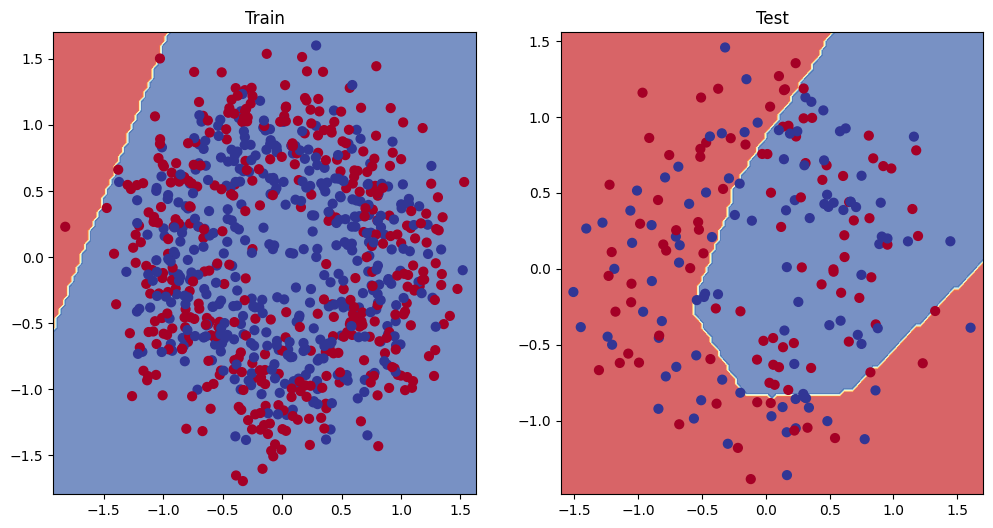

In [38]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model3, X_test, y_test) # model_3 = has non-linearity